In [1]:
import cfgrib
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

from baselines.data_processor import DataProcessor
from baselines.linear_reg.simple_linear_regressor import SimpleLinearRegressor

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [2]:
# https://github.com/ecmwf/cfgrib/issues/164
grib_data = cfgrib.open_datasets('../data2022.grib')
surface = grib_data[0] 
hybrid = grib_data[1] 

In [3]:
feature_list = ['t2m', 'sp', 'tcc', 'u10', 'v10', 'tp']
t2m = surface.t2m.to_numpy() - 273.15  # -> C
sp = surface.sp.to_numpy() / 100       # -> hPa
tcc = surface.tcc.to_numpy()
u10 = surface.u10.to_numpy()
v10 = surface.v10.to_numpy()
tp = hybrid.tp.to_numpy().reshape((-1,) + hybrid.tp.shape[2:])
data = np.stack((t2m, sp, tcc, u10, v10, tp), axis=-1)

In [4]:
s = 3
fh = 1

processor = DataProcessor(data)
X, y = processor.preprocess(s, fh, use_neighbours=True)
X_train, X_test, y_train, y_test = processor.train_test_split(X, y)

In [5]:
X.shape, y.shape

((1429, 25, 45, 5, 3, 6), (1429, 25, 45, 1, 6))

<LINEAR>
t2m => RMSE:  1.37596; SE: 0.03804538822322544
sp => RMSE:  1.8484; SE: 0.5929344035917864
tcc => RMSE:  0.27379; SE: 0.006463310819156775
u10 => RMSE:  1.42984; SE: 0.053224365545897906
v10 => RMSE:  2.45326; SE: 0.0433727751208579
tp => RMSE:  0.00024; SE: 7.197806686884264e-06


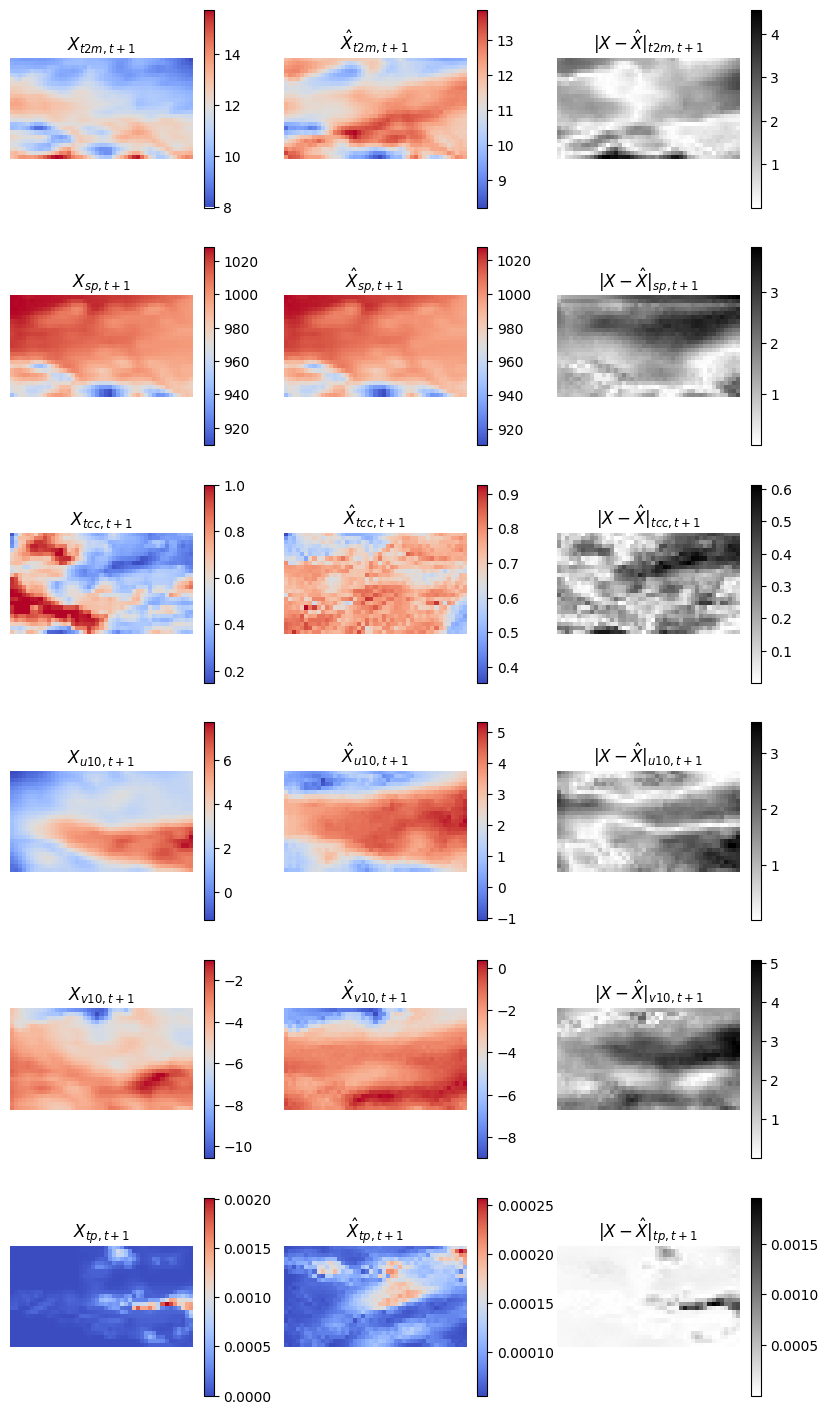

Evaluation metrics for entire test set:
t2m => RMSE: 2.663; SE: 0.010200797752953046
sp => RMSE: 1.154; SE: 0.03702956939722691
tcc => RMSE: 0.252; SE: 0.0004828579478474195
u10 => RMSE: 1.387; SE: 0.005026088934293758
v10 => RMSE: 1.244; SE: 0.004110117665590181
tp => RMSE: 0.0; SE: 3.4696299529253065e-07


 16.118446588516235 [S]


In [8]:
from time import time 
start = time()

available_reg = ['linear']
for reg in available_reg:
    print(f'<{reg.upper()}>')
    linearreg = SimpleLinearRegressor(X.shape, fh, feature_list, regressor_type=reg)
    linearreg.train(X_train, y_train)
    _ = linearreg.predict_and_evaluate(X_test, y_test, max_samples=1)
    print()
    
stop = time()
print('\n', stop-start, '[S]')